## $Probability\ and\ Statistics \ Project $
## $Phase1 \ Section5$

### Theoretical 23:
Assuming that ther are $m \leq \frac{n(n-1)}{2}$
 friendship among all people in this cluster and the probability of two people being friends is $p$,
 The probabality of getting all the friendship true is 
 $\frac{p^m (1-p)^{\frac{n(n-1)}{2} - m}}{ \sum_{k=0}^{n} C(\frac{n(n-1)}{2},k) p^k (1-p)^{\frac{n(n-1)}{2} - k}}$

### Theoretical 24:
Assuming that this time we are aware of the value of $m$, the probability will become
$\frac{p^m (1-p)^{\frac{n(n-1)}{2} - m}}{ C(\frac{n(n-1)}{2},m) p^m (1-p)^{\frac{n(n-1)}{2} - m}} = \frac{1}{C(\frac{n(n-1)}{2},m)}$

### Theoretical 25:
Assuming that we want to foretell 20% of all friendships true and the rest of all $m$ frienships falsely is:

### Simulating 17:
First we will define a funtion that will create and store the Adjacency matrix $A \in \mathbb{R}^{n \times n}$ where each element fo the matrix is a
$a_{i,j} \approx Bernoulli(p)$

In [59]:
from scipy.stats import bernoulli, binom
import numpy as np

def generate_sample_bernoulli(n,p):
    mlist = a = [[0] * n] * n
    c2n = int(n*(n-1)/2)
    p = 0.0034
    c = 0
    X = bernoulli(p)
    X_samples = X.rvs(c2n)
    for i in range(0, n):
        for j in range(0, i):
            mlist[i][j] = X_samples[c]
            c += 1
            mlist[j][i] = mlist[i][j]
    return mlist
    
def generate_Adjacency_Bernoulli(n,p):
    mlist = np.zeros([n,n])
    for i in range(0,n):
        mlist[i,i] = 0
        for j in range(0,n):
            mlist[j,i] = np.random.binomial(1,p)
            mlist[j,i] = mlist[j,i]
    return mlist


In [63]:
n1 = 1000
m1 = 3000
p1 = 0.0034
list1 = []
h= 0
for N in range(0,10):
    Adj1 = generate_Adjacency_Bernoulli(n1,p1)
    list1.append(sum(sum(Adj1))/2)
    #for row in range(0, n1):
        #if(sum(row)>L)
        #h += Adj1[x][:].count(1)
    
list1

[1640.0,
 1705.0,
 1682.0,
 1711.0,
 1695.0,
 1709.5,
 1727.5,
 1699.0,
 1693.0,
 1696.0]

In [64]:
m = 3000
mean= sum(list1)/len(list1)
print("mean of all friendships = "+str(mean))
error = (mean-m)/mean
print("error with respect to m = "+str(error))

mean of all friendships = 1695.8
error with respect to m = -0.7690765420450525


<BarContainer object of 4 artists>

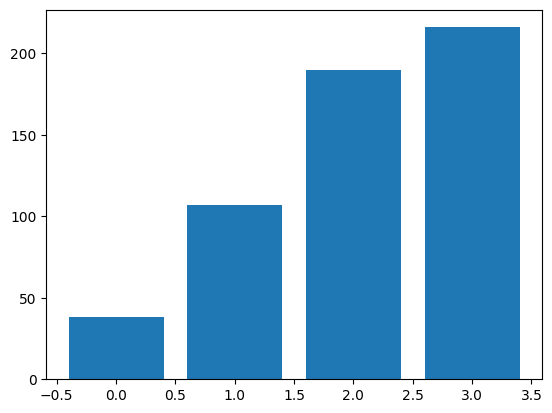

In [84]:
import matplotlib.pyplot as plt

ss = 4
list_ = [0,0,0,0]
data = {}
data[0]= 0
data[1]=0
data[2]=0
data[3]=0
for item in sum(Adj1):
    if item<ss:
        data[item] +=1
        #list_[item] +=1

#plt.hist(list_)
plt.bar(data.keys(),data.values())
plt.show()

### Theoretical 26:
Let $X_{ij}$ be the random variable for person $i$ and person $j$ be friends. Since all $X_{ij}$'s are all i.i.d. $X_{i,j} \approx Bernoulli(p)$. Let the expected value of all friendships be named $M = \mathbb{E} |edges|$ . We know that if we count all degrees of people in graph that would be: $2|edges| = \sum_{k=0}^{n} deg(v_k)= \sum{i=0}^{n} X_{ii} + 2\sum_{1 \leq i< j \leq n} X_{i,j}$. Getting Expecrd value from both RHS and LHS implies that:

$2\mathbb{E} |edges| = 2M = \sum_{k=0}^{n} deg(v_k)= \sum_{i=0}^{n}\mathbb{E}X_{ii} + 2\sum_{1 \leq i< j \leq n}\mathbb{E} X_{i,j} \rightarrow M = \frac{1}{2} np + C(n,2) p = \frac{n^2 p}{2}$.
But if we consider $X_{ii}$ to be zero then we would have :
$M = \frac{n(n-1)p}{2}$

### Simulating 18:
In this simulating firstly, we wish to find $L$ which is the mean of all friendship of a person. Then with the help of that we will continue to find the mean of This so called "Hamrang" group's number.


In [71]:
def Hamrang_finder_by_adjmat(adj_mat):
    counter = 0
    n = len(adj_mat[0])
    #L = (adj_mat).count(1)/n
    L = sum(sum(adj_mat))/n
    for row in adj_mat:
        #if adj_mat[x][:].count(1)> L:
        if (sum(row)>L):
            counter+=1
    return counter

list2 = []
n2 =1000
p2 = 0.00016
for N in range(0,10):
    adj_mat2 = generate_Adjacency_Bernoulli(n2,p2)
    list2.append(Hamrang_finder_by_adjmat(adj_mat2))
list2

[151, 124, 135, 149, 131, 147, 146, 140, 141, 165]

In [72]:
xx = sum(list2)/len(list2)
print("the mean of Hamrang group among all People is = " + str(xx))

the mean of Hamrang group among all People is = 142.9


### Theoretical 27:
Let $Y_i$ be the number of neighbors of person $i$,since $Y_i = \sum_{j=1}^{n} X_{i,j} \approx Binomial(n,p)$ and $\mathbb{E} X_{i,j} = p$ which will result in $\mathbb{E}Y_i = \sum_{j=1}^{n} \mathbb{E} X_{i,j} = np = 0.016$.


### Theoretical 28:
if each person is having $L$ friends on average, we choose someone randomly, then he will be "Hamrang" with Probavility:
$\sum_{i=⌊L+1⌋}^{n} C(n−1,i)p^{i}(1−p)^{n−i−1}$ Since in this case $L<1$ then $⌊L⌋=0$ which suggests:
$z =  \sum_{i=1}^{n} C(n−1,i)p^{i}(1−p)^{n−i−1} = (p+1−p)^{n−1} - C(n−1,0)(1−p)^{n−1} = 1−(1−p)^{n−1}$. 
 Finally letting $n=1000$ and $p=0.000016$ will lead to: $z≈0.15$. So we can deduce that for each person being "Hamrang" is a Bernoulli random variable with parameter $z=0.15$ whcih his named $h_i$ after the $i$-th person.
 => $h_i≈Bernoulli(p=0.15)$, which finally suggest the expected value of "Hmarang" people among all will be : $H=\sum_{i=1}^{n} h_i$ getting expexted value from both sides implies that : $\mathbb{E} H = n\mathbb{E}h_i = nz ≈147.73$


### Simulating 19:


In [150]:
import itertools
# from itertools import combination

def meshgrid(n):
    i =0 
    j =0 
    res = [i for j in range(0,n)]
    return res

def find_subsets(set_, n):
    res = list(itertools.combinations(set_,n))
    return res

def find_num_of_triagles(adj_mat):
    res = 0
    n = len(mat)
    indices = meshgrid(n)
    all_3sized_subsets = find_subsets(indices,3)
    
    
    for x,y,z in all_3sized_subsets:
        if ((mat[x,y] + mat[y,z] + mat[z,x] ==2)):
                counter += 1
    
    return res
    

def find_num_of_taragozari(adj_mat):
    res = 0
    n = len(mat)
    indexes = [i for i in range(n)]
    all_3sized_subsets = find_subsets(indexes,3)
    for x,y,z in all_3sized_subsets:
        if (mat[x,y] + mat[y,z] + mat[z,x]) == 3 :
            res += 1
    
    return res


In [151]:
# in order to save our computer we need to take a smaller n with respect to n=3000
n3 = 300
p3 = 0.01
adj_mat3 = generate_Adjacency_Bernoulli(n3,p3)
taragozari_num = find_num_of_taragozari(adj_mat3)
triagle_num = find_num_of_triagles(adj_mat3)
print("number of all trargozari : " + str(taragozari_num))
print("number of all triangles(chains) : "+str(triagle_num))

number of all trargozari : 10176
number of all triangles(chains) : 0


In [120]:
n3 = 100
p3 = 0.01
N = 5
taragozari = []
zangiri = []
for temp in range(0,N):
    adj_mat3 = generate_Adjacency_Bernoulli(n3,p3)
    zangiri.append(find_num_of_triagles(adj_mat3))
    taragozari.append(find_num_of_taragozari(adj_mat3))
taragozari

[0, 0, 0, 0, 0]

In [123]:
zangiri

[0, 0, 0, 0, 0]

In [19]:
tara = sum(taragozari)/len(taragozari)
mosalas = sum(zangiri)/len(zangiri)
print("the mean of taragozari is : "+ str(tara))
print("the mean of chains is : "+ str(mosalas))

the mean of taragozari is : 0.0
the mean of mosalas is : 32340.0


### Simulating 20:
First we will compute number friendship having a confied set of all vertices by this function down below. Then we will find each person's friends(neighbors) and find the friendships inside that set of friends using the function we defined. 

In [36]:
def find_num_of_edges(adj_mat, vertics):
    s = 0
    for i in vertics:
        for j in vertics:
            if adj_mat[i][j] ==1 :
                s += 1
    return int(s/2)

n4 = 1000
p4 = 0.003
adj_mat4 = generate_Adjacency_Bernoulli(n4,p4) 
total_relations = 0
for i in range(n4):
    temp_neighbors = []
    for j in range(n4):
        if adj_mat4[i][j] == 1:
            temp_neighbors.append(j)
    total_relations += find_num_of_edges(adj_mat4,temp_neighbors)
yyy = total_relations/n4
print("Average friendships among the set of each person's friends = "+ str(yyy))

Average friendships among the set of each person's friends = 2.0


### Simulating 21:
In this sectio n we will use networkx library in order to find the shortest path between nodes in  the graph. The  we will find the average distance between two arbitrary vertices.

In [98]:


import networkx as nx

n5 = 1000   # /////////////////////////////////////////////////////////// n5 = 1000
p5 = 0.0033
adj_mat5 = generate_Adjacency_Bernoulli(n5,p5)

my_graph = nx.path_graph(n5)
i = 0
total_path = 0
j =0 
# making the graph
while(i<n5):
    j = i
    if adj_mat5[i,j] ==1 :
        my_graph.add_edge(i,j)
        j +=1
    i+=1

# finding distances
for i in range(0,n5):
    for j in range(0,n5):
        total_path += nx.shortest_path_length(my_graph, i,j)
    
c2n = n5*(n5 -1 )/2 
result = total_path*2/c2n 
print(result)
    
    

134.66666666666666


### Simulating 22:
Here we will repeat the same thing but for 100 times ...
i n order to find the longest path each time and finally calculate its mean(expected value)

In [91]:
N = 100
n6 = 50
p6 = 0.34
longest_paths = []
for i in range(n6):
   
    adj_mat6 = generate_Adjacency_Bernoulli(n6,p6)
    my_gr = nx.path_graph(n6)
    i = 0
    while(i<n6):
        j = i 
        while(j<n6):
            if adj_mat6[i][j] ==1 :
                my_gr.add_edge(i,j)
            j +=1
        i+=1
temp_max =0 
for i in range(0,n6):
    for j in range(0,n6):
        if nx.shortest_path_length(my_gr,i,j)> temp_max:
            temp_max =  nx.shortest_path_length(my_gr,i,j)
    longest_paths.append(temp_max)
zzzz = sum(longest_paths)/len(longest_paths)
print("The mean of longest path between two arbitrary nodes is = "+ str(zzzz))


The mean of longest path between two arbitrary nodes is = 2.0


### Simulating 23:


<BarContainer object of 19 artists>

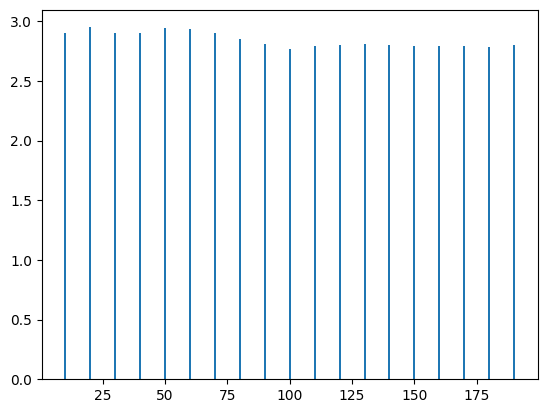

In [99]:
chains_num = []
data_input = [i*10 + 10 for i in range(19)]
steps = (200 - 10)//10
N = 100   # ///////////////////////////////////////////////   N =10
p7 = p6
LongestPaths = []

for z in range(steps):
    for _ in range(N):
        n7 = z*10 + 10
        adj_mat = generate_Adjacency_Bernoulli(n7,p7)
        graph = nx.path_graph(n7)

        i = 0
        while (i < n):
            j = i
            while (j < n):
                if (adj_mat[i,j] == 1):
                    graph.add_edge(i, j)
                j = j+1
            i = i+1

        temp_max=0
        for i in range(n):
            for j in range(n):
                if( nx.shortest_path_length(graph, i, j)>temp_max):
                    temp_max = nx.shortest_path_length(graph, i, j)
        LongestPaths.append(temp_max)

    chains_num.append(sum(LongestPaths)/len(LongestPaths))
    
plt.figure()
plt.bar(data_input,chains_num)

as $n$ grows larger, the expected vlaue of chains will convege to 2.5

### Simulation 24:

In [171]:
def Triangle(n,p):
    res = 0
    for N in range(100):
        adj_mat = generate_Adjacency_Bernoulli(n,p)
        res += cal_number_of_taragozari(adj_mat)
    return res/100


n8= 100
p8 = 0.34
y = 0
x = Triangle(n8,p8)
print("number of triangles = "+str(z))

number of triangles = 101.76000000000016


### Simulation 25:

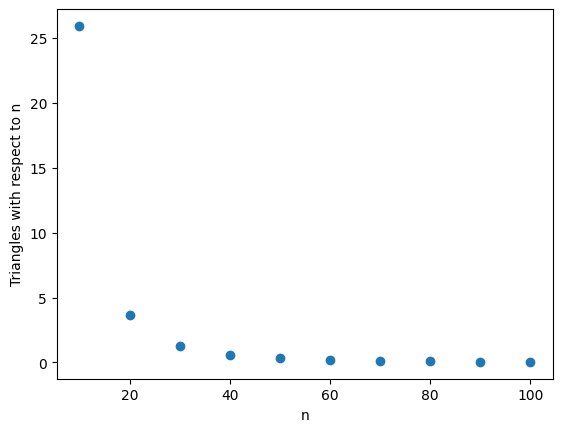

In [170]:
def Triangle(n,p):
    res = 0
    for N in range(100):
        adj_mat = generate_Adjacency_Bernoulli(n,p)
        res += cal_number_of_taragozari(adj_mat)
    return res/100

def get_number_of_taragozari(adj_mat):
    n = len(adj_mat)
    res = 0
    indices = [i for i in range(n)]
    all_3subset = find_subsets(indices,3)
    for x,y,z in all_3subset:
        if mat[x,y]==1 and mat[y,z]==1 and  mat[z,x]==1 :
            res += 1
    return res


y = []
x = [i*10 + 10 for i in range(10)]
steps = 10

for t in range(steps):
    n = t*10 + 10
    p = 60/(n*n)
    y.append(Triangle(n,p))
    
plt.scatter(x,y)
plt.xlabel("n")
plt.ylabel("Triangles with respect to n");
plt.show()

As you can see since $p=\frac{60}{n^2}$ is decreasing with $n$ the probability if two peple being frrinnds is decreasing which results in less and less Expectation if triangles.

### Simulation 26:


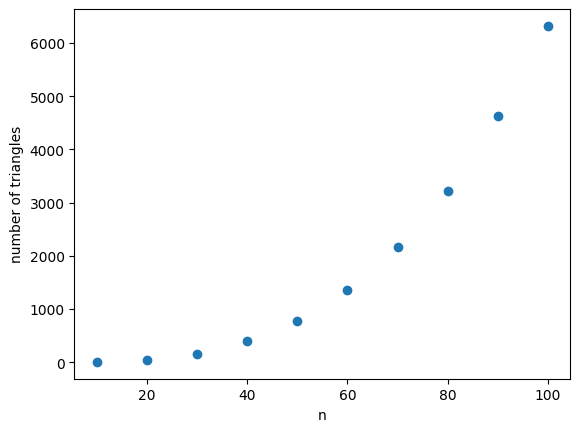

In [173]:
import matplotlib.pyplot as plt

y2 = []
x2 = [i*10 + 10 for i in range(10)]
steps = 10
p = 0.34
for t in range(steps):
    n = t*10 + 10
    y2.append(Triangle(n,p))
    
plt.scatter(x2,y2)
plt.xlabel("n",)
plt.ylabel("number of triangles");

it ca be deduced that if $p$ is constant, increasing of $n$ will result in rising of Expectation of number of tringles.  

### Simulation 27:


In [ ]:
y3 = []
x3 = [i*50 + 50 for I in range(20)]
steps = 20
for t in range(steps):
    n = 50*t
y3 = []
x3 = [i*50 + 50 for I in range(20)]
steps = 20
for t in range(steps):
    n = 50*t +50
    p = 1/n
    y.append(Triangle(n,p))
plt.scatter(x,y)
plt.xlabel("n")
plt.ylabel("number of triangles with respect to n")
Xcumulate = np.cumsum(x, axis =0)
Ycumulate = np.cumsum(y, axis =0)
Nn = len( Ycumulate)
for i in range(Nn):
    Ycumulate[i] = Ycumulate[i]/Xcumulate[i]

plt.scatter(Xcumulate,Ycumulate)
plt.xlabel("n")
plt.ylabel("cumulative mean with respect to n")


As we an see cumulative mean goes to 0 as n grows larger and larger.

### Theoretical 29:
In taragozari($T_0$) two out of three nodes must be connected, wheras in triangle($T_1$) all nodes are connected to each other.
$T_0 = \mathbb{E}|taragozari| = C(n,3)C(3,2) p^2 (1-p)$ while 
$T_1 = \mathbb{E}|triangles| = \frac{1}{3} C(n,3) p^3 $ 

### Theoretical 30:
if $x,y,z$ are im a cluster and also each is connected to at least one node. The probabaility of having "taragozai" is :
$\frac{ C(n,3)C(3,2) p^2 (1-p}{ C(n,3)C(3,2) p^2 (1-p) +  C(3,n) p^3}$. However the probability of having a "triangle" is : $\frac{ C(n,3) p^3}{ C(n,3)C(3,2) p^2 (1-p) + C(n,3) p^3}$

### Theoretical 32:
let $u,v$ be two nodes. if we want them not having mutual friendship with person $x_k$ the probability will be $(1-p)^2$. if we want no $x_k$ have relatins with both $u,v$;since these aer independant the probabaility will become $\mathbb{P}(I_{u,v} =1)= 
(1-p)^{2n-4}$

### Theoretical 33:
Let $d(i)$ be the number of connected nodees to the $i$ -th person. We know that if $m = |edges|$ then $2m = \sum_{k=0}^{n} d(k)$
since each edge was counted twice in the summation. Let us define $\bar{d}(i) = C(n,2) - d(i)$ which is clearly the number of disconnected nodes to the $i$-th person. We know that:
$X_n = \sum_{i=0}^{n} C(\bar{d}(i) , 2) = \frac{1}{2} \sum_{i=0}^{n} (\bar{d}(i)^2 -\bar{d}) $ which taking Expectation implies that: $ \mathbb{E} X_n = \frac{1}{2} \sum_{i=0}^{n} ( \mathbb{E}\bar{d}(i)^2 - \mathbb{E}\bar{d}) $. 
but we knew $ \mathbb{E}m = \frac{n^2p}{2} = \frac{1}{2}  \mathbb{E}d(i) \rightarrow \mathbb{E}d(i) = n^2p \rightarrow \mathbb{E}\bar{d}(i) = n - n^2p $.Now comuting $\mathbb{E}\bar{d}(i)^2 = \sum_{k=0}^{n} k^2 p^k (1-p)^{n-k-1} C(n-1,k) = n(n-1)p((n-2)p +1) $ which leads to $\mathbb{E} X_n = n(n(n-1)p(n-2)p +1)) - (n- n^2 p)$



### Theoretical 34:
using Markov inequality we can deduce that:
$ \mathbb{P}(X_n \geq 1) \geq \frac{ \mathbb{E} X_n }{1} =  n(n(n-1)p(n-2)p +1)) - (n- n^2 p)$

## $Probability\ and\ Statistics \ Project $
## $Phase1 \ Section6$

### Theoretical 36:
Here is the probavility of  going from node $i$ to node $j$ at one step $P_{i,j} = \frac{A_{i,j}}{d(i)}$. If $A_{i,j}=0$, so does $P_{i,j}$; and if $A_{i,j}=1$ since there are $d(i)$ possible routes, $P_{i,j} = \frac{1}{d(i)}$

### Theoretical 37:
We can rewrite $P_{i,j}$ as $P_{i,j} = \frac{A_{i,j}}{d(i)}$ and $D$ is a diagonal matrix, we can deduce that: $ D \times P = A \rightarrow P = D^{-1} A \rightarrow D P^{(t)} D^{-1} = (P^{(t)})^T$ 

### Theoretical 38:
first we consider the case $t=3$ (The base of the induction). Similar to prior aproach we obtain that: 
$[P^3]_{i,j} = \sum_{k=0}^{n} \sum_{s=0}^{n} P_{ik} P_{ks} P_{sj} =  \sum_{k=0}^{n}P_{ik}\sum_{s=0}^{n} P_{ks} P_{sj} = 
\sum_{k=0}^{n}P_{ik} [P^2]_{k,j}$. Now we suppose that $[P^{t-1}]_{h,j}$ is the probability of going form $h$ to $j$ in $t-1$ steps. Thus we get $[P^t]_{i,j} = \sum_{k=0}^{n}P_{ih}[P^{t-1}]_{h,j} = [P^t]_{i,j}$ . Thus the induction's step is prove since $f(3)$ is true and $f(n-1)$ will lead to $f(n)$. T

### Theoretical 39:
we can deduce that $P^{t}_{ij}=\sum_{k=1}^{n}P^{t-1}_{ik}P_{kj}$ from the proof we did in Theoretical 38.

### Theoretical 40: 
Suppose that $ V =\{ v_1 ,v_2, ..., v_{h-1} \}$ are between nodes $i,j$. Moreover assume that$ v_0 = v_{h+1} = i, v_{h} =j$.
We can deduce that in going from $i$ to $j$ =:The probability will be :
$[P^h]_{i,j} = \prod_{k=0}^{h} [P]_{v_{j},v_{k+1}} = \prod_{k=0}^{h} \frac{ A_{v_{k},v_{k+1}}}{d(v_k)}$ . The same approach for going from $j$ to $i$ will result in:
$ [P^h]_{j,i} = \prod_{k=0}^{h} [P]_{v_{h-k},v_{h-k-1}} = \prod_{k=0}^{h} \frac{ A_{v_{h-k},v_{h-k-1}}}{d(v_k)}$. which since $A_{i,j} = A_{j,i}$ will finally leads to : $\frac{P_{ij}^{(t)}}{P_{ji}^{(t)}}=\frac{1/d(i)}{1/d(j)}=\frac{d(j)}{d
(i)}$

### Theoretical 41:
Since $i,j$ are friends in the cluster, we can deduce that $[P^t]_{i,j} \approx [P^t]_{j,k}$ . because the intersts are similar and there is good chance if the random path is similar too, then $[P^t]_{i,j} \approx [P^t]_{j,k}$.

### Theoretical 42:
From adding Principle we can deduce that: $P_{C_{1}, k}=\frac{1}{\left\|C_{1} \right\|}\sum
_{v_{i}\in C_{1} }P_{ik}^{(t)}$. letting this into the geiven formula implies that:

$d(C_{1},C_2)= \sqrt{\sum_{k=0}^{n} r_{ij}^2}
= \sqrt{\sum_{k=1}^{n}\frac{(P_{C_{1}, k}-
P_{C_{2}, k})^{2}}{d(k)}}$

### Theoretical 43:
We can use an aproach similar to "K-means" methos. Assume that the vector $X = \{ x_1, x_2, x_3, ..,x_n\}$ are the data we wish to cluster and $S = \{ S_1,..,S_k\}$ is the set of clusers. $S_k$'s must be chosen such that within-cluster sum of squares is minimized. Therefore we wish to minimize this variable $\sum_{i=1}^{k} \sum_{x \in S_i} ||x -\mu_{i}||^2$ i among all data. Thus, we get:
$\arg \min_s \sum_{i=1}^{k} \sum_{x \in S_i} ||x -\mu_{i}||^2 = \arg \min_s \sum_{i=1}^{k}  |S_i| Var(S_i)$ where $\mu_{i}$ is the mean of $i$-th cluster $S_i$. So  we will continue on clustering the data if we take two arbitrary $S_i , S_j$, then the combination of these two will have larger " within-cluster sum of squares".
